In [175]:
import pandas as pd
import numpy as np

In [176]:
df = pd.read_csv("/content/Customers.csv")
df.dropna()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [177]:
df_male = df[df["Gender"] == "Male"]
print(df_male["Profession"].value_counts())
print("In male customers frequent customers profession : Artist" )
print("In male customers least customers profession : Homemaker" )
print("Mean income of male customers : ",df_male["Annual Income ($)"].mean())
print("Median income of male customers : ",df_male["Annual Income ($)"].median())
print("Mode income of male customers : ",df_male["Annual Income ($)"].mode()[0])

Artist           232
Healthcare       143
Entertainment    101
Engineer          76
Doctor            72
Executive         66
Lawyer            56
Marketing         32
Homemaker         21
Name: Profession, dtype: int64
In male customers frequent customers profession : Artist
In male customers least customers profession : Homemaker
Mean income of male customers :  110991.3230958231
Median income of male customers :  108055.0
Mode income of male customers :  89000


In [178]:
df_female = df[df["Gender"] == "Female"]
print(df_female["Profession"].value_counts())
print("In female customers frequent customers profession : Artist" )
print("In female customers least customers profession : Homemaker" )
print("Mean income of female customers : ",df_female["Annual Income ($)"].mean())
print("Median income of female customers : ",df_female["Annual Income ($)"].median())
print("Mode income of female customers : ",df_female["Annual Income ($)"].mode())

Artist           380
Healthcare       196
Entertainment    133
Engineer         103
Doctor            89
Executive         87
Lawyer            86
Marketing         53
Homemaker         39
Name: Profession, dtype: int64
In female customers frequent customers profession : Artist
In female customers least customers profession : Homemaker
Mean income of female customers :  110553.7150084317
Median income of female customers :  111174.0
Mode income of female customers :  0    31000
1    50000
Name: Annual Income ($), dtype: int64


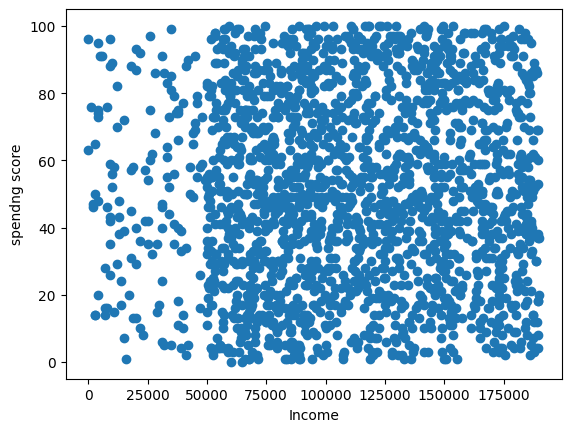

In [179]:
import matplotlib.pyplot as plt
x = df["Annual Income ($)"]
z = df["Spending Score (1-100)"]
plt.xlabel("Income")
plt.ylabel("spendng score")
plt.scatter(x , z)

 I am using kmeans clustering.
> key Idea : we are clustering the customers based on annual income and spending score into 3 clusters which has offer as a discount of 25% , 50% and 75%.



In [180]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
to_encode = ["Gender"]
df["Gender"] = le.fit_transform(df["Gender"])
df["Profession"] = le.fit_transform(df["Profession"])
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7
1996,1997,0,91,73158,32,1,7,7
1997,1998,1,87,90961,14,5,9,2
1998,1999,1,77,182109,4,4,7,2


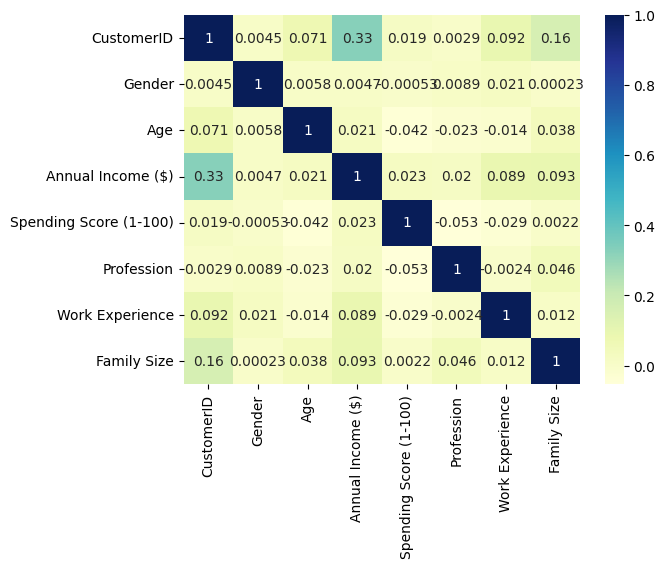

In [186]:
import seaborn as sns
correlation_with_target = df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the correlaton heatmap we can see that annual income and spending score are positively correlated.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


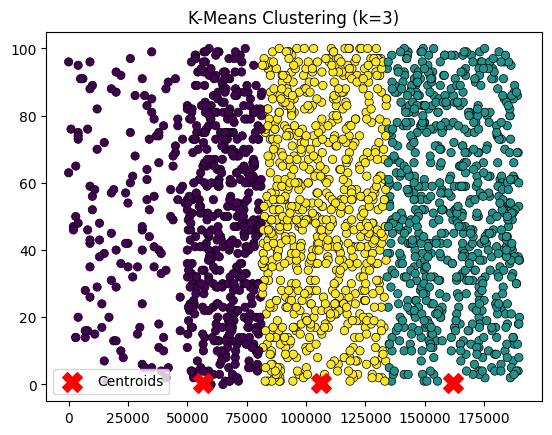

In [181]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the results
plt.scatter(x , z, c=labels, cmap='viridis', edgecolors='k', linewidths=0.5)
plt.scatter(centroids[:, 3], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()

In [188]:
print(labels)

[0 0 2 ... 2 1 2]


In [192]:
df["Offer"] = labels
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,labels,Offers,Offer
0,1,1,19,15000,39,5,1,4,0,0,0
1,2,1,21,35000,81,2,3,3,0,0,0
2,3,0,20,86000,6,2,1,1,2,2,2
3,4,0,23,59000,77,7,0,2,0,0,0
4,5,0,31,38000,40,3,2,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7,1,1,1
1996,1997,0,91,73158,32,1,7,7,0,0,0
1997,1998,1,87,90961,14,5,9,2,2,2,2
1998,1999,1,77,182109,4,4,7,2,1,1,1


conclusion : Customers with low spending score , medium spending score and hight spending are with respective to annual income are clustered.


1.   0 = 75% discount offer
2.   1 = 50% discount offer
3.   2 = 25% discount offer



Therefore based on the spending score and income the discount offer is determined by the machine learning model.